In [191]:
# by darren :)
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import numpy as np

In [134]:
from datetime import datetime

In [135]:
df=pd.read_csv('ResaleflatpricesbasedonregistrationdatefromJan2017onwards.csv')

In [136]:
df.head()


,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0
1,2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,250000.0
2,2017-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,262000.0
3,2017-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,62 years 01 month,265000.0
4,2017-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,265000.0


In [137]:
desc=pd.DataFrame(index=df.columns)
desc['dtype']=df.dtypes
desc['null']=df.isna().sum()
desc['nunique']=df.nunique()
desc=pd.concat([desc,df.describe().T],axis=1)


In [138]:
df['month']=pd.to_datetime(df['month'])



In [139]:
desc

,dtype,null,nunique,count,mean,std,min,25%,50%,75%,max
month,object,0,90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
town,object,0,26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
flat_type,object,0,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
block,object,0,2709,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
street_name,object,0,566,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
storey_range,object,0,17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
floor_area_sqm,float64,0,172,182233.0,97.138748,24.028183,31.0,82.0,93.0,112.0,249.0
flat_model,object,0,21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
lease_commence_date,int64,0,55,182233.0,1996.024041,14.051445,1966.0,1985.0,1996.0,2010.0,2020.0
remaining_lease,object,0,676,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [140]:
df._get_numeric_data()

,floor_area_sqm,lease_commence_date,resale_price
0,44.0,1979,232000.0
1,67.0,1978,250000.0
2,67.0,1980,262000.0
3,68.0,1980,265000.0
4,67.0,1980,265000.0
...,...,...,...
182228,146.0,1988,800000.0
182229,142.0,1988,850000.0
182230,146.0,1986,790000.0
182231,146.0,1988,1000000.0


A Correlation Matrix of Resale Prices, Floor Area(sqm), lease_commence_date is shown below:

Text(0.5, 1.0, 'Correlation Between Numerical Features')

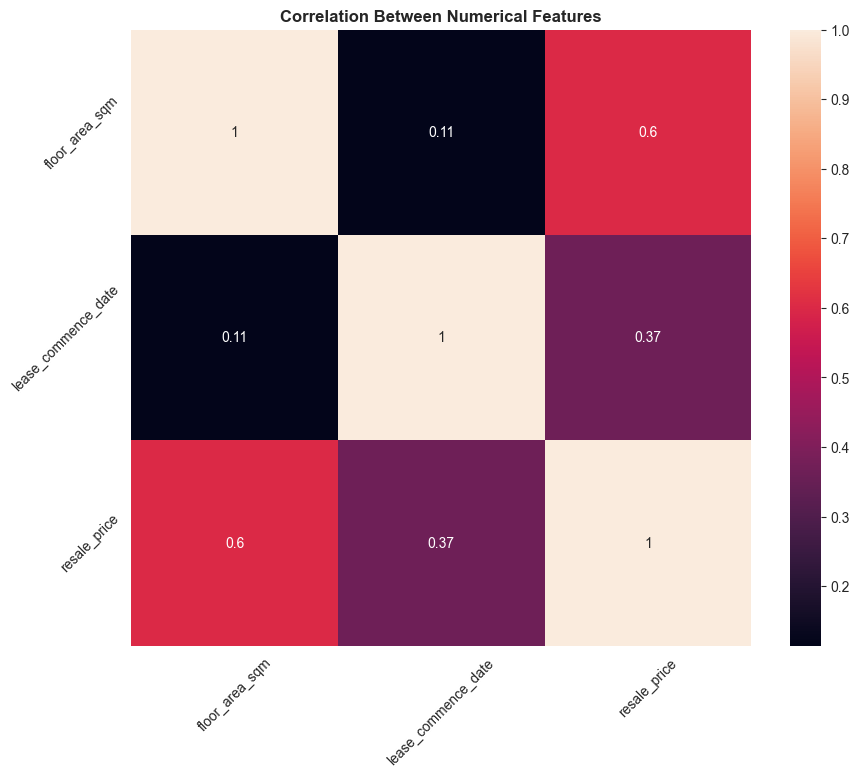

In [141]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(numeric_only=True),annot=True)
plt.yticks(rotation=45)
plt.xticks(rotation=45)
plt.title('Correlation Between Numerical Features',weight='bold')

1. What type of Resale Flat is the most popular in Singapore?

In [142]:
df['town']

0         ANG MO KIO
1         ANG MO KIO
2         ANG MO KIO
3         ANG MO KIO
4         ANG MO KIO
             ...    
182228        YISHUN
182229        YISHUN
182230        YISHUN
182231        YISHUN
182232        YISHUN
Name: town, Length: 182233, dtype: object

In [143]:
central_region = ["MARINE PARADE","BUKIT TIMAH","BISHAN","BUKIT MERAH","GEYLANG","KALLANG/WHAMPOA","QUEENSTOWN","TOA PAYOH","CENTRAL AREA"]
north_region = ["WOODLANDS","YISHUN","SEMBAWANG"]
northEast_region = ["ANG MO KIO","PUNGGOL","SERANGOON","SENGKANG","HOUGANG"]
east_region = ["BEDOK","TAMPINES","PASIR RIS"]
west_region = ["BUKIT BATOK","BUKIT PANJANG","CHOA CHU KANG","CLEMENTI","JURONG EAST","JURONG WEST"]

to_map={
    'Central':central_region,
    'North':north_region,
    'Northeast':north_region,
    'East':east_region,
    'West':west_region

}

def region_identifier(x):
    if x in central_region:
        return 'Central'
    elif x in north_region:
        return 'North'
    elif x in northEast_region:
        return 'Northeast'
    elif x in east_region:
        return 'East'
    elif x in west_region:
        return 'West'


df['Region']=df['town'].str.upper().map(region_identifier)

In [144]:
df['Region'].value_counts()

Region
Northeast    48637
West         41923
Central      34013
North        30372
East         27288
Name: count, dtype: int64

In [145]:
df

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,Region
0,2017-01-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0,Northeast
1,2017-01-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,250000.0,Northeast
2,2017-01-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,262000.0,Northeast
3,2017-01-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,62 years 01 month,265000.0,Northeast
4,2017-01-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,265000.0,Northeast
...,...,...,...,...,...,...,...,...,...,...,...,...
182228,2024-06-01,YISHUN,EXECUTIVE,351,YISHUN AVE 11,04 TO 06,146.0,Maisonette,1988,63 years 03 months,800000.0,North
182229,2024-06-01,YISHUN,EXECUTIVE,328,YISHUN RING RD,04 TO 06,142.0,Apartment,1988,63 years 01 month,850000.0,North
182230,2024-06-01,YISHUN,EXECUTIVE,723,YISHUN ST 71,10 TO 12,146.0,Maisonette,1986,61 years,790000.0,North
182231,2024-06-01,YISHUN,EXECUTIVE,826,YISHUN ST 81,10 TO 12,146.0,Maisonette,1988,62 years 08 months,1000000.0,North


Text(0.5, 1.0, 'Figure 1: Resale Flats from each Town in Singapore from 2017-2024')

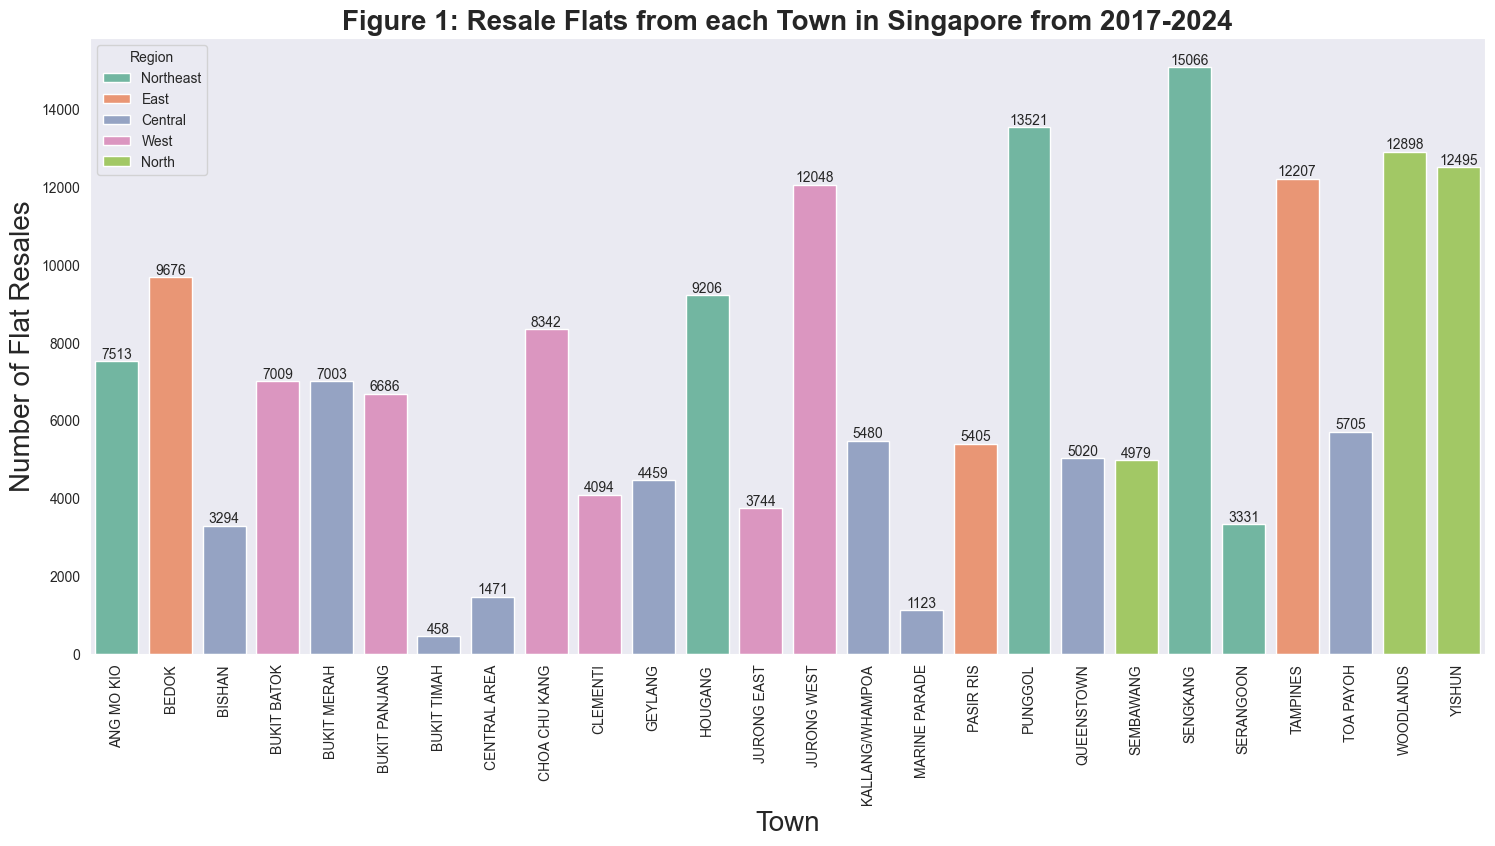

In [146]:
plt.figure(figsize=(18,8))
#style sets color background
sns.set_style("dark")
# params 2 sets the number of colors
g=sns.countplot(df,x='town',hue='Region',palette=sns.color_palette("Set2",5))
for i in g.containers:
    g.bar_label(i)
plt.xticks(rotation=90)
plt.xlabel('Town',size=20)
plt.ylabel('Number of Flat Resales',size=20)
plt.title('Figure 1: Resale Flats from each Town in Singapore from 2017-2024',weight='bold',size=20)

In [147]:
sales_count=df['Region'].value_counts().to_numpy()

In [148]:
labels=df['Region'].value_counts().reset_index()['Region']

In [149]:
labels

0    Northeast
1         West
2      Central
3        North
4         East
Name: Region, dtype: object

In [150]:
sales_count

array([48637, 41923, 34013, 30372, 27288])

Text(0.5, 1.0, 'Figure 2: Resale Flats from each Town in Singapore from 2017-2024')

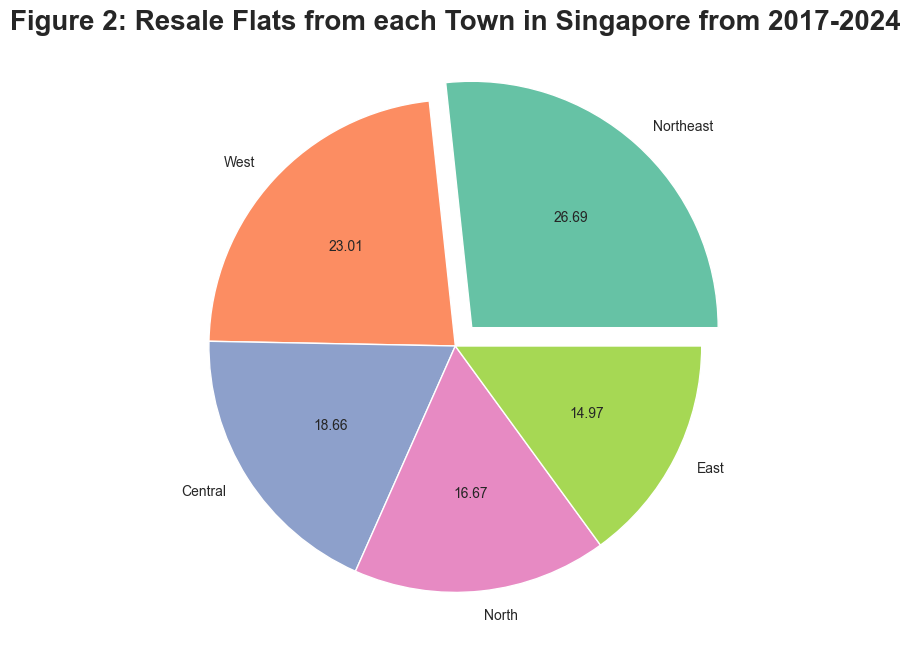

In [151]:

plt.figure(figsize=(18,8))
sns.set_palette(sns.color_palette("Set2",5))

explode = [0.1, 0, 0, 0,0] 
#autopct in python format,# explode takes in array
plt.pie(sales_count,labels=labels,autopct='%.2f',explode=explode)
plt.title('Figure 2: Resale Flats from each Town in Singapore from 2017-2024',weight='bold',size=20)

In [152]:
df.sort_values('flat_type')
matureEstates= ["ANG MO KIO","BEDOK","BISHAN","BUKIT MERAH","BUKIT TIMAH","CENTRAL AREA","CLEMENTI","GEYLANG","KALLANG/WHAMPOA","MARINE PARADE","PASIR RIS","QUEENSTOWN","SERANGOON","TAMPINES","TOA PAYOH"]

def map_mature(x):
    if x in matureEstates:
        return 'Mature Estate'
    else:
        return 'Non-Mature Estates'
    
df['state']=df['town'].map(map_mature)

In [153]:
df['state'].value_counts()

state
Non-Mature Estates    105994
Mature Estate          76239
Name: count, dtype: int64

In [186]:
df.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,Region,state,year,month_name
0,2017-01-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0,Northeast,Mature Estate,2017,Jan
1,2017-01-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,250000.0,Northeast,Mature Estate,2017,Jan
2,2017-01-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,262000.0,Northeast,Mature Estate,2017,Jan
3,2017-01-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,62 years 01 month,265000.0,Northeast,Mature Estate,2017,Jan
4,2017-01-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,265000.0,Northeast,Mature Estate,2017,Jan


C:\Users\darre\AppData\Local\Temp\ipykernel_23732\2777622060.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45)
C:\Users\darre\AppData\Local\Temp\ipykernel_23732\2777622060.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(ax[0].get_xticklabels(), rotation=45)


Text(0.5, 0.98, 'Figure 3: Total Resale Flats of Flat Types in Singapore - 2017 to 2024')

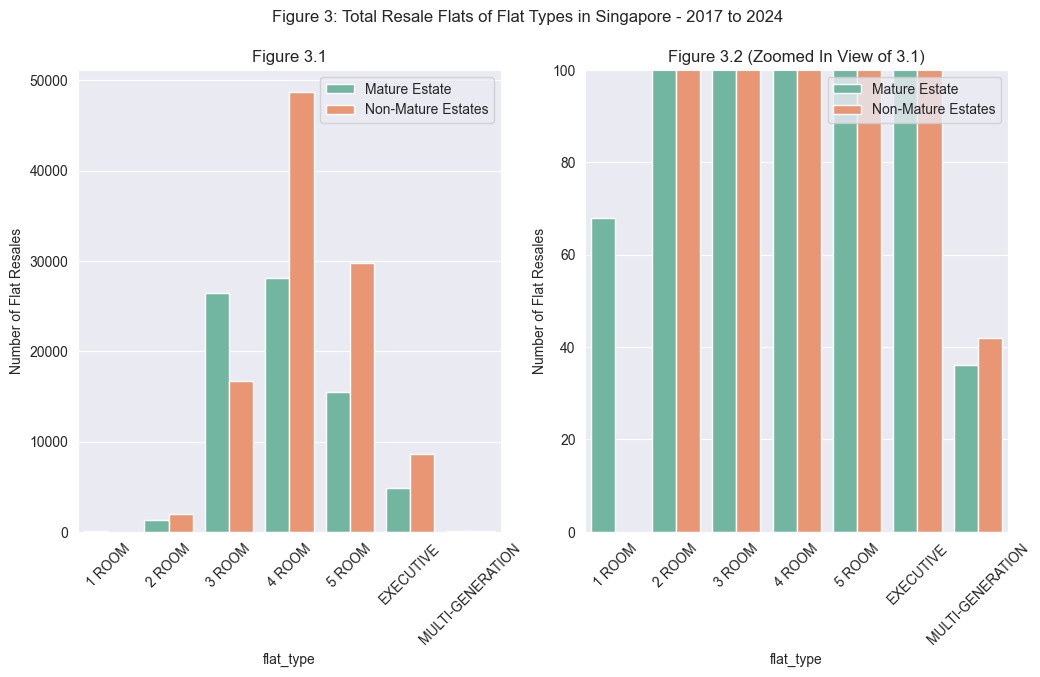

In [217]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

#small data. either use log scale or ylim

#original view
g=sns.countplot(data=df.sort_values('flat_type'), x='flat_type', hue='state', ax=ax[0])
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45)
ax[0].grid(axis='y')
ax[0].set_title('Figure 3.1')
ax[0].set_ylabel('Number of Flat Resales')
g.get_legend().set_title('')



#zoom in
a=sns.countplot(data=df.sort_values('flat_type'), x='flat_type', hue='state', ax=ax[1])
ax[1].set_xticklabels(ax[0].get_xticklabels(), rotation=45)
ax[1].grid(axis='y')
ax[1].set_title('Figure 3.2 (Zoomed In View of 3.1)')
ax[1].set_ylim(0, 100) 
ax[1].set_ylabel('Number of Flat Resales')
a.get_legend().set_title('')

plt.suptitle('Figure 3: Total Resale Flats of Flat Types in Singapore - 2017 to 2024')

Resale Flats from Top 3 Town in Singapore from 2017-2024

In [155]:
# By number of resales 
TOP_3_TOWNS=df.groupby('town').agg('count').sort_values('state',ascending=False).reset_index()['town'][:3]
TOP_3_TOWNS=TOP_3_TOWNS.tolist()

In [156]:
top3df=df.loc[df['town'].isin(TOP_3_TOWNS)]

Text(0, 0.5, 'Number of Flat Resales')

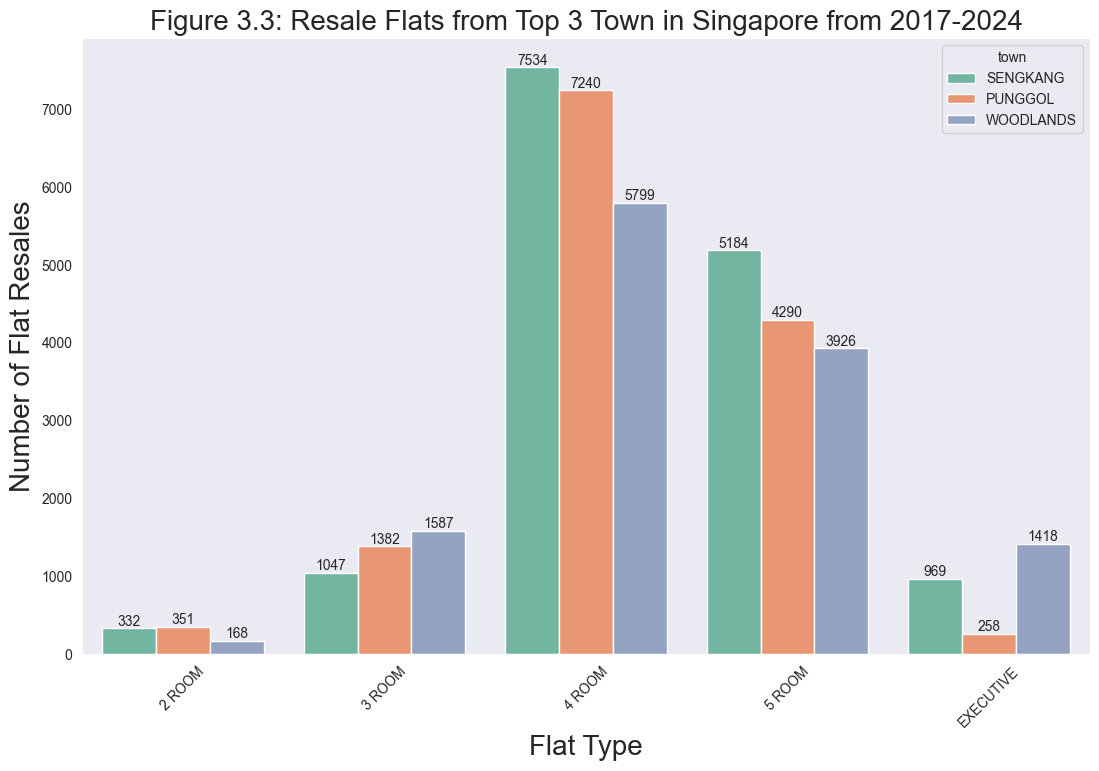

In [219]:
plt.figure(figsize=(13,8))
g=sns.countplot(top3df.sort_values('flat_type'),x='flat_type',hue='town')

for i in g.containers:
    g.bar_label(i)

plt.title('Figure 3.3: Resale Flats from Top 3 Town in Singapore from 2017-2024',size=20)
plt.xticks(rotation=45)
plt.xlabel('Flat Type',size=20)
plt.ylabel('Number of Flat Resales',size=20)



'4 Room Flats' Resale Price over the Years 2017-2023

In [158]:
#adding new column year

df['year']=df['month'].dt.year

Text(0.5, 1.0, 'Figure 4: "4 Room Flats" Resale Price over the Years 2017 to 2023')

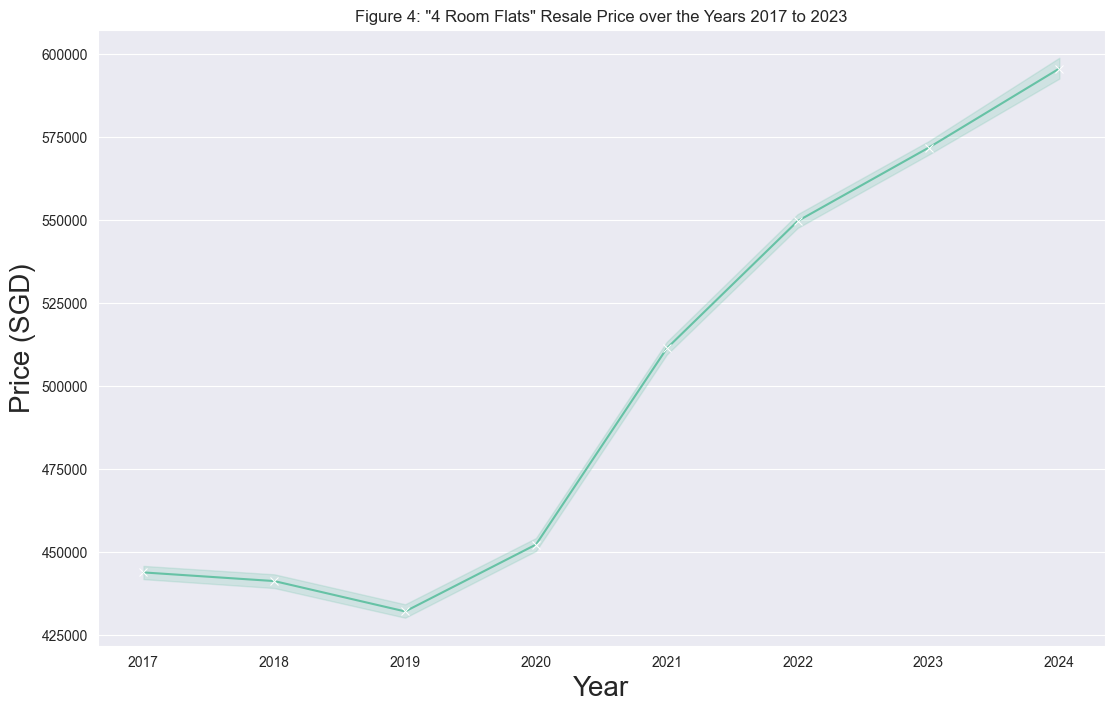

In [221]:
plt.figure(figsize=(13,8))
sns.lineplot(df,x='year',y='resale_price',marker="x")
plt.grid(True,axis="y")
plt.xlabel("Year",size=20)
plt.ylabel("Price (SGD)",size=20)
plt.title("Figure 4: \"4 Room Flats\" Resale Price over the Years 2017 to 2023")


"4 Room Flats" Resale Price Changes over the Months

In [160]:
#mapping months from numeric values to alphabetical form 
month_map = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
             7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}

df['month_name']=df['month'].dt.month.map(month_map)

#year 2023 only
df_2023=df.query('year==2023')

#year 2018 only
df_2018=df.query('year==2018')

Text(0.5, 0.95, 'Figure 5: "4 Room Flats" Resale Price Changes over the Months')

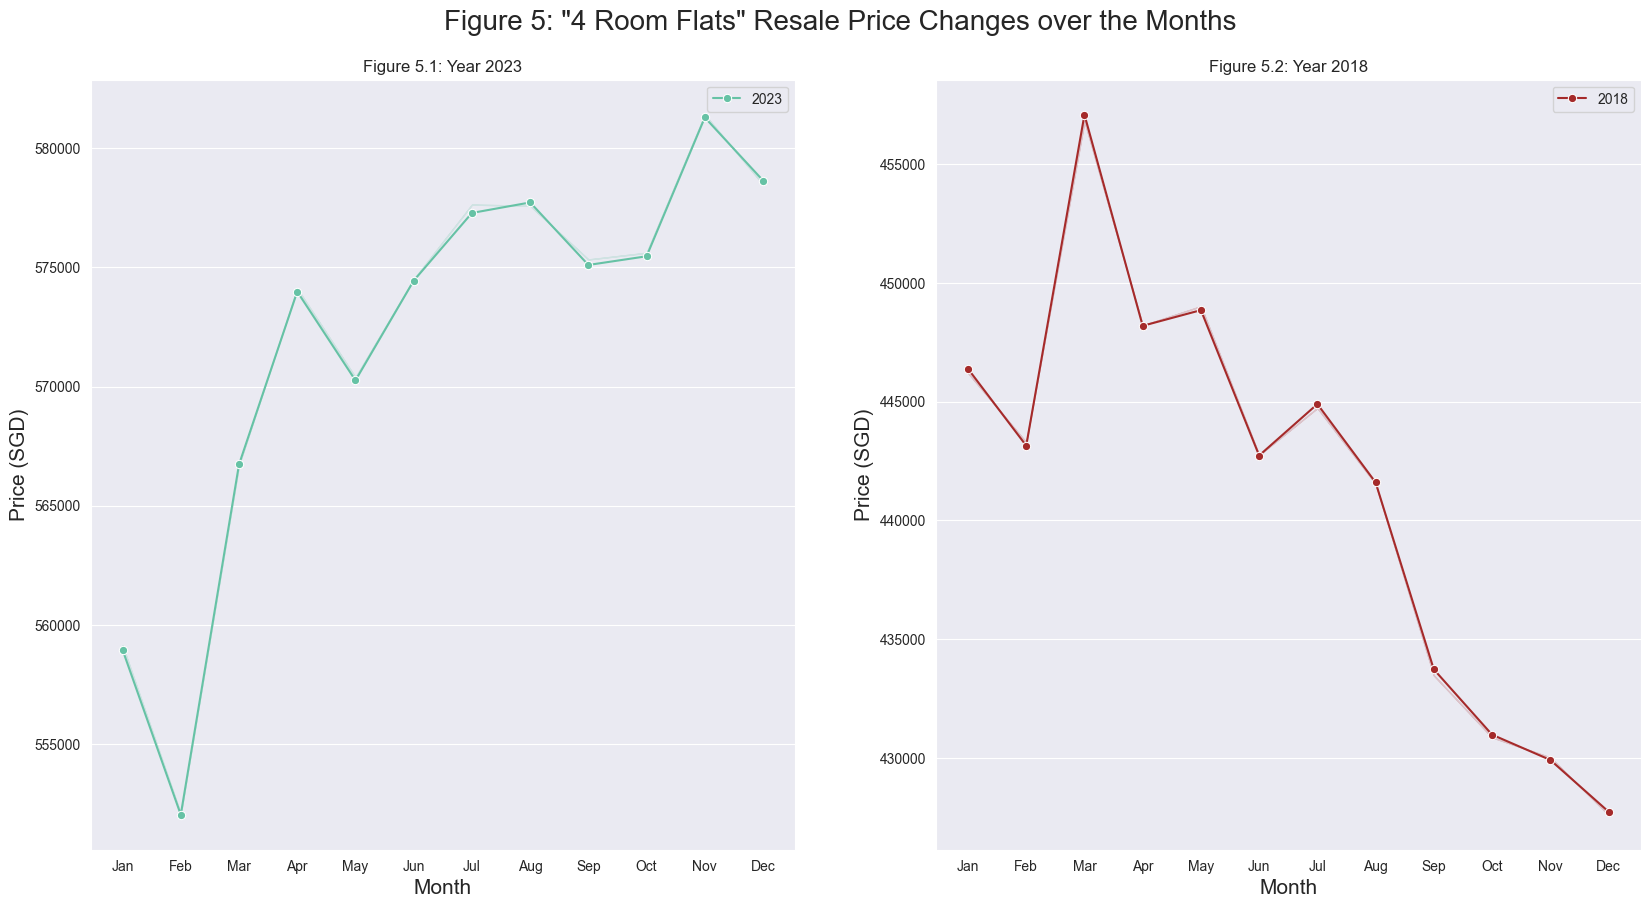

In [222]:
fig,ax=plt.subplots(1,2,figsize=(20,10))

#for ax[0]
sns.lineplot(df_2023,x='month_name',y='resale_price',ax=ax[0],
             errorbar=('ci', False),
             marker='o',label='2023')
ax[0].set_xlabel('Month',size=15)
ax[0].set_ylabel('Price (SGD)',size=15)
ax[0].grid(True,axis='y')
ax[0].set_title('Figure 5.1: Year 2023')
ax[0].legend()

#for ax[1]
sns.lineplot(df_2018,x='month_name',y='resale_price',ax=ax[1],
             errorbar=('ci', False),
             marker='o',label='2018',color='brown')
ax[1].set_xlabel('Month',size=15)
ax[1].set_ylabel('Price (SGD)',size=15)
ax[1].grid(True,axis='y')
ax[1].set_title('Figure 5.2: Year 2018')
ax[1].legend()

plt.suptitle('Figure 5: "4 Room Flats" Resale Price Changes over the Months',size=20,y=0.95)

In [242]:
df_four_room.describe()

,month,floor_area_sqm,lease_commence_date,resale_price,year
count,68261,68261.000000,68261.000000,6.826100e+04,68261.000000
mean,2021-05-25 15:16:43.565725696,94.971467,2000.170214,5.063755e+05,2020.947671
min,2018-01-01 00:00:00,70.000000,1967.000000,2.180000e+05,2018.000000
25%,2019-11-01 00:00:00,91.000000,1988.000000,4.100000e+05,2019.000000
50%,2021-07-01 00:00:00,93.000000,2000.000000,4.800000e+05,2021.000000
75%,2022-12-01 00:00:00,101.000000,2014.000000,5.700000e+05,2022.000000
max,2024-06-01 00:00:00,176.000000,2020.000000,1.500000e+06,2024.000000
std,NaN,6.942855,13.433057,1.426577e+05,1.845462


Text(0.5, 1.0, 'Figure 6.2: Year 2018 to 2023 "4 Room Flats" Flat Resales in each Month')

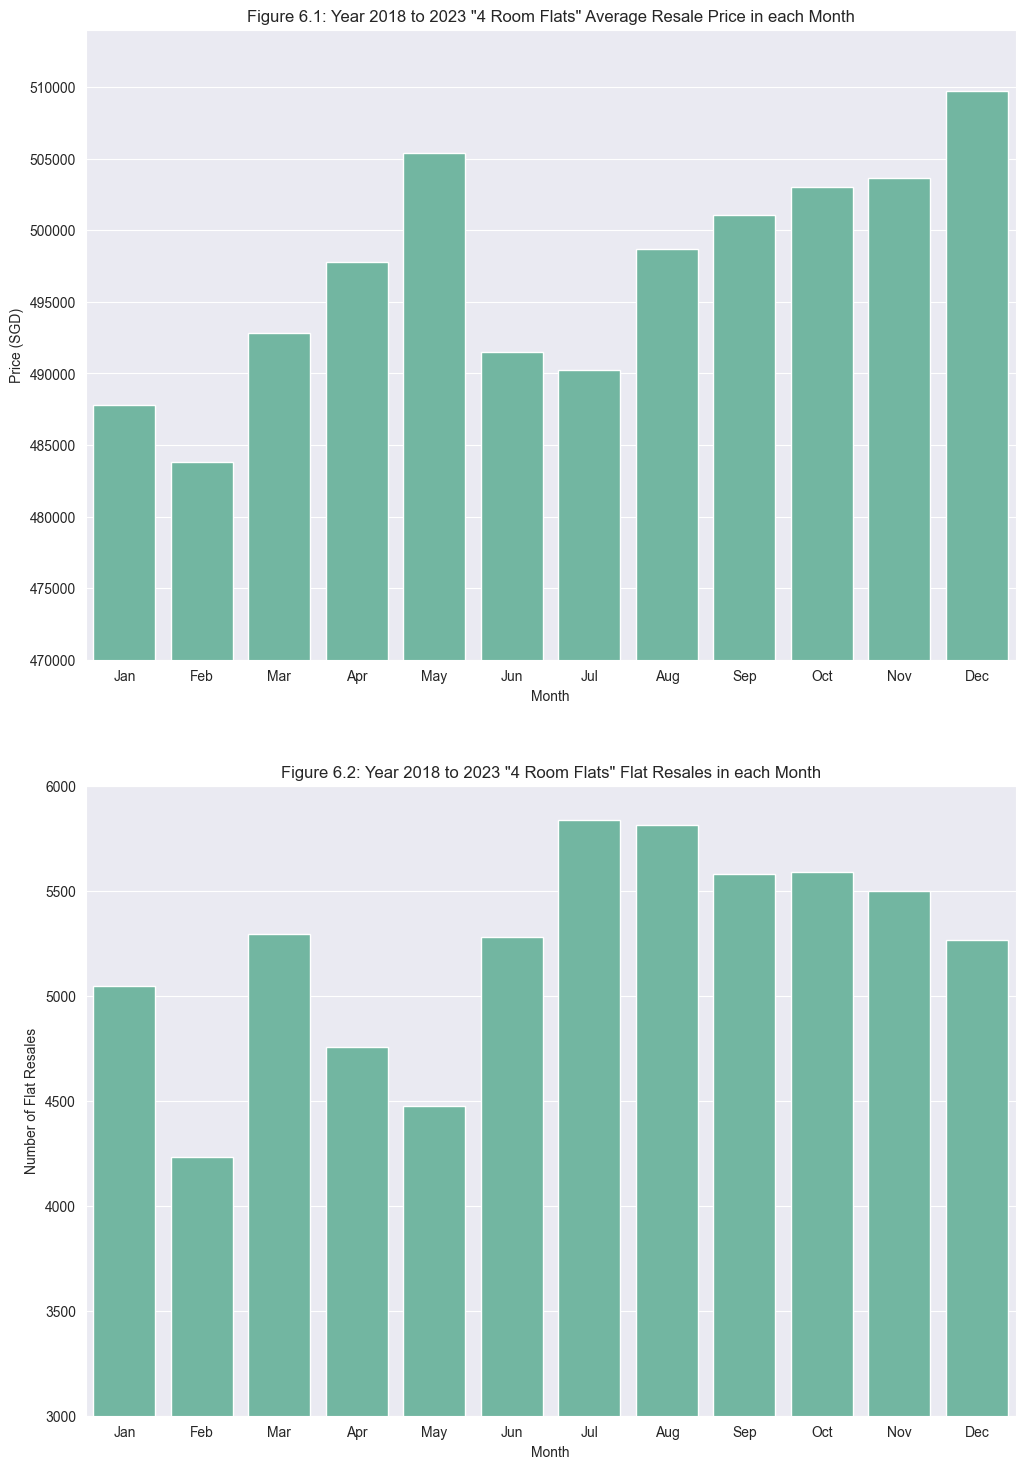

In [259]:
fig,ax= plt.subplots(2,1,figsize=(12,18))

df_four_room=df[df['flat_type']=='4 ROOM']

#Taking the avg of prices in each month over the last 5 years excluding 2024
df_four_room=df_four_room[df_four_room['year'].isin([2018,2019,2020,2021,2022,2023])]

sns.barplot(df_four_room,x='month_name',y='resale_price',ax=ax[0],errorbar=None)
ax[0].set_ylim(470000,514000)
ax[0].grid(axis='y')
ax[0].set_xlabel("Month")
ax[0].set_ylabel("Price (SGD)")
ax[0].set_title("Figure 6.1: Year 2018 to 2023 \"4 Room Flats\" Average Resale Price in each Month")

sns.countplot(df_four_room,x='month_name',ax=ax[1])
ax[1].set_ylim(3000,6000)
ax[1].grid(axis='y')
ax[1].set_xlabel("Month")
ax[1].set_ylabel("Number of Flat Resales")
ax[1].set_title("Figure 6.2: Year 2018 to 2023 \"4 Room Flats\" Flat Resales in each Month")

Top 3 Towns Resale Prices

In [162]:
top3df.head()
top3df['resale_price']=top3df['resale_price']/1000000

C:\Users\darre\AppData\Local\Temp\ipykernel_23732\4111730359.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top3df['resale_price']=top3df['resale_price']/1000000


Text(0.5, 1.0, 'Figure 7: Top 3 Towns Resale Prices')

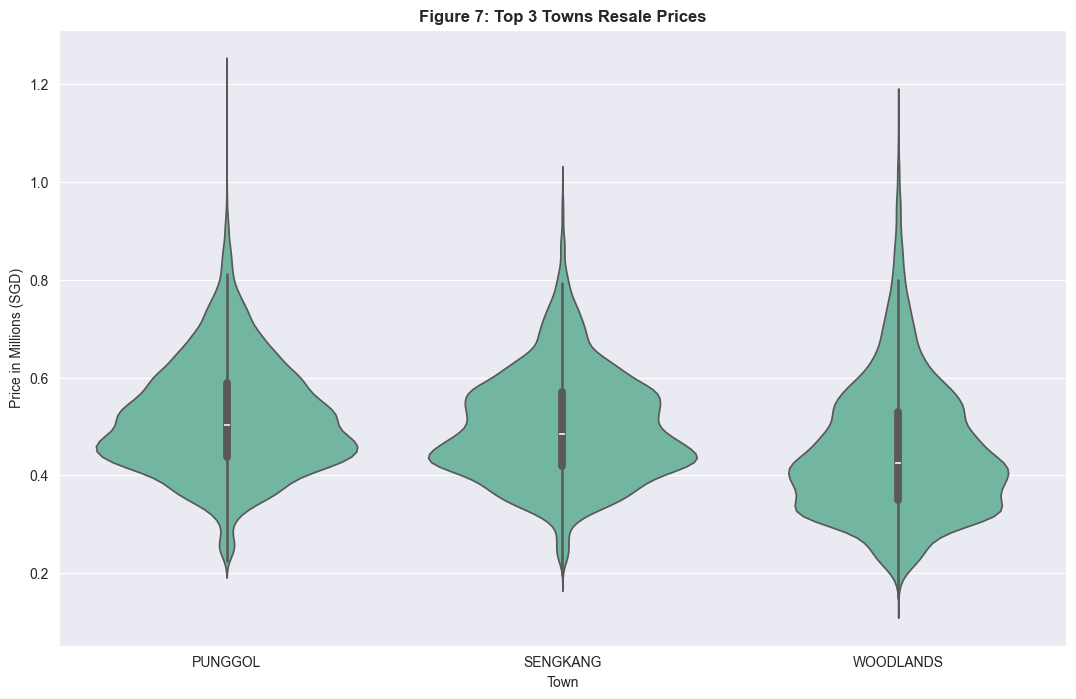

In [163]:
from matplotlib.ticker import ScalarFormatter

plt.figure(figsize=(13, 8))
g = sns.violinplot(data=top3df, x='town', y='resale_price')
plt.grid(axis='y')
plt.ylabel('Price in Millions (SGD)')
plt.xlabel('Town')

# Use ScalarFormatter to avoid scientific notation
g.yaxis.set_major_formatter(ScalarFormatter())
g.yaxis.get_major_formatter().set_useOffset(False)
g.yaxis.get_major_formatter().set_scientific(False)

plt.title('Figure 7: Top 3 Towns Resale Prices', weight='bold')

Top 3 Towns Flat sizes

Text(0.5, 1.0, 'Figure 8: Top 3 Towns Flat Prices')

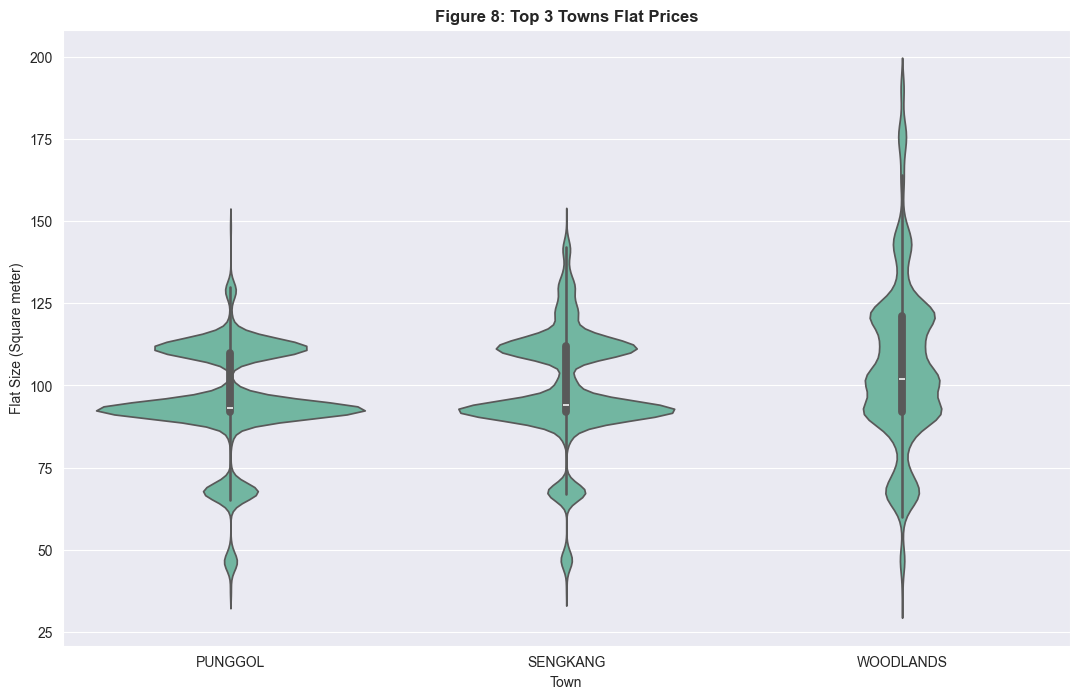

In [164]:
plt.figure(figsize=(13,8))
sns.violinplot(top3df,x='town',y='floor_area_sqm')
plt.grid(axis='y')
plt.ylabel('Flat Size (Square meter)')
plt.xlabel('Town')
plt.title('Figure 8: Top 3 Towns Flat Prices',weight='bold')

In [165]:
top3df.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,Region,state
708,2017-01-01,PUNGGOL,4 ROOM,203B,PUNGGOL FIELD,10 TO 12,85.0,Model A,2004,86 years 10 months,0.350,Northeast,Non-Mature Estates
709,2017-01-01,PUNGGOL,4 ROOM,132,EDGEDALE PLAINS,07 TO 09,91.0,Premium Apartment,2003,85 years 10 months,0.370,Northeast,Non-Mature Estates
710,2017-01-01,PUNGGOL,4 ROOM,128A,PUNGGOL FIELD WALK,07 TO 09,91.0,Model A,2003,85 years 07 months,0.370,Northeast,Non-Mature Estates
711,2017-01-01,PUNGGOL,4 ROOM,106B,PUNGGOL FIELD,13 TO 15,90.0,Model A,2003,85 years 01 month,0.380,Northeast,Non-Mature Estates
712,2017-01-01,PUNGGOL,4 ROOM,614A,EDGEFIELD PLAINS,01 TO 03,92.0,Model A,2012,95 years,0.408,Northeast,Non-Mature Estates


In [166]:
top3df['town']=='SENGKANG'
sk_df=top3df.loc[top3df['town']=='SENGKANG']
pung_df=top3df.query('town=="PUNGGOL"')
wood_df=top3df.query('town=="WOODLANDS"')


Text(0.5, 0.98, 'Figure 9: Resale Price against Floor Area Relationship of Different Flat Types in the Top 3 Towns - 2017 to 2024')

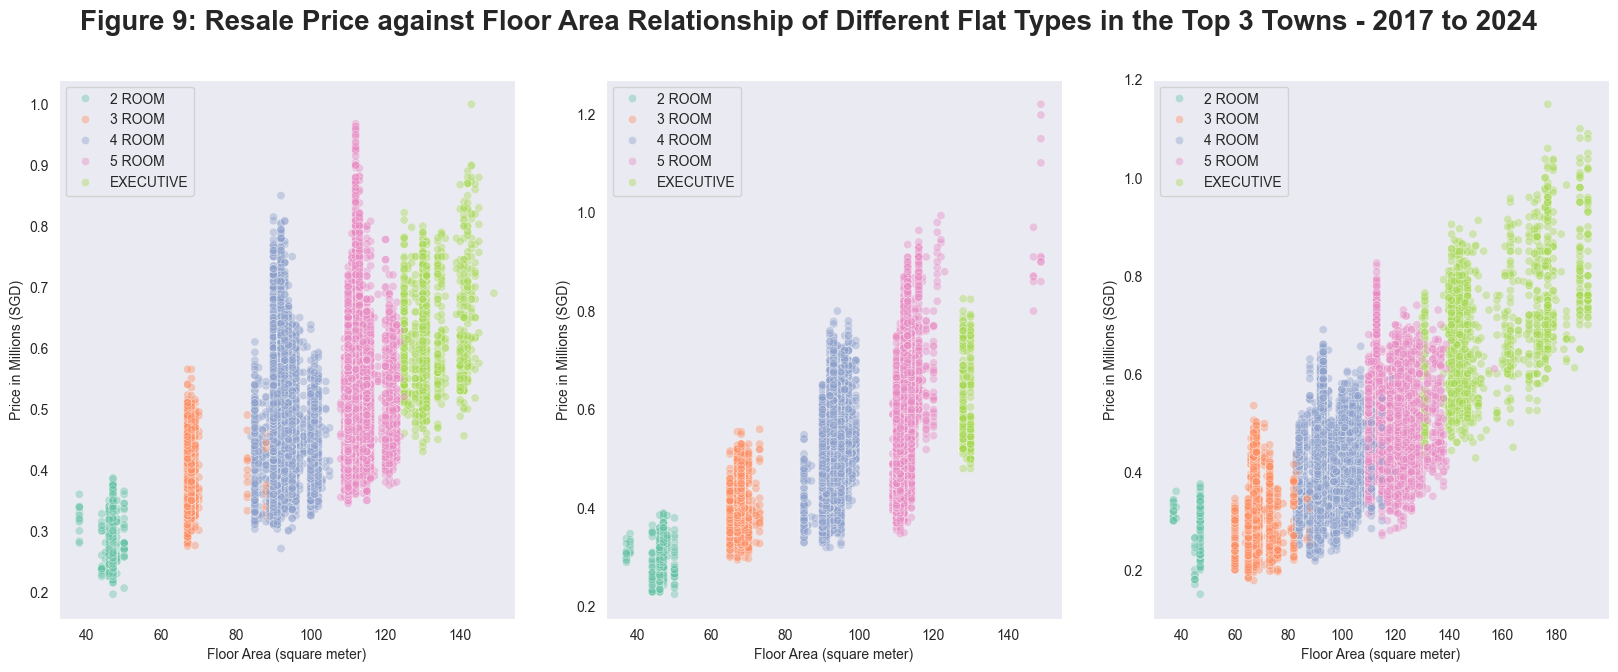

In [167]:
fig,ax=plt.subplots(1,3,figsize=(20,7))
order=['2 ROOM','3 ROOM','4 ROOM','5 ROOM','EXECUTIVE']
#sengkang
g=sns.scatterplot(sk_df,x='floor_area_sqm',y='resale_price',hue='flat_type',hue_order=order,alpha=0.4,marker='o',ax=ax[0])
g.get_legend().set_title('')
ax[0].set_xlabel('Floor Area (square meter)')
ax[0].set_ylabel('Price in Millions (SGD)')
g.yaxis.set_major_formatter(ScalarFormatter())
g.yaxis.get_major_formatter().set_useOffset(False)
g.yaxis.get_major_formatter().set_scientific(False)

#punggol
p=sns.scatterplot(pung_df,x='floor_area_sqm',y='resale_price',hue='flat_type',hue_order=order,alpha=0.4,marker='o',ax=ax[1])
p.get_legend().set_title('')
ax[1].set_xlabel('Floor Area (square meter)')
ax[1].set_ylabel('Price in Millions (SGD)')
p.yaxis.set_major_formatter(ScalarFormatter())
p.yaxis.get_major_formatter().set_useOffset(False)
p.yaxis.get_major_formatter().set_scientific(False)

#woodland
w=sns.scatterplot(wood_df,x='floor_area_sqm',y='resale_price',hue='flat_type',hue_order=order,alpha=0.4,marker='o',ax=ax[2])
w.get_legend().set_title('')
ax[2].set_xlabel('Floor Area (square meter)')
ax[2].set_ylabel('Price in Millions (SGD)')
w.yaxis.set_major_formatter(ScalarFormatter())
w.yaxis.get_major_formatter().set_useOffset(False)
w.yaxis.get_major_formatter().set_scientific(False)


fig.suptitle("Figure 9: Resale Price against Floor Area Relationship of Different Flat Types in the Top 3 Towns - 2017 to 2024", fontsize=20,weight='bold')

In [168]:
#Taking years number by slicing

to_modify=[sk_df,pung_df,wood_df]

for town in to_modify:
    town['remaining_lease_years']=town['remaining_lease'].apply(lambda x: x[:3])
    #converting in thousands
    town['resale_price']=town['resale_price']*1000

sk_df.head()

C:\Users\darre\AppData\Local\Temp\ipykernel_23732\4113732745.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  town['remaining_lease_years']=town['remaining_lease'].apply(lambda x: x[:3])
C:\Users\darre\AppData\Local\Temp\ipykernel_23732\4113732745.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  town['resale_price']=town['resale_price']*1000
C:\Users\darre\AppData\Local\Temp\ipykernel_23732\4113732745.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,Region,state,remaining_lease_years
816,2017-01-01,SENGKANG,2 ROOM,441B,FERNVALE RD,19 TO 21,50.0,Model A,2012,94 years 02 months,273.0,Northeast,Non-Mature Estates,94
817,2017-01-01,SENGKANG,3 ROOM,441A,FERNVALE RD,10 TO 12,69.0,Model A,2012,94 years 01 month,342.0,Northeast,Non-Mature Estates,94
818,2017-01-01,SENGKANG,3 ROOM,445B,FERNVALE RD,10 TO 12,67.0,Model A,2012,94 years 10 months,345.0,Northeast,Non-Mature Estates,94
819,2017-01-01,SENGKANG,3 ROOM,445A,FERNVALE RD,13 TO 15,67.0,Model A,2012,94 years 10 months,348.0,Northeast,Non-Mature Estates,94
820,2017-01-01,SENGKANG,3 ROOM,211D,COMPASSVALE LANE,10 TO 12,68.0,Model A,2013,95 years 01 month,360.0,Northeast,Non-Mature Estates,95


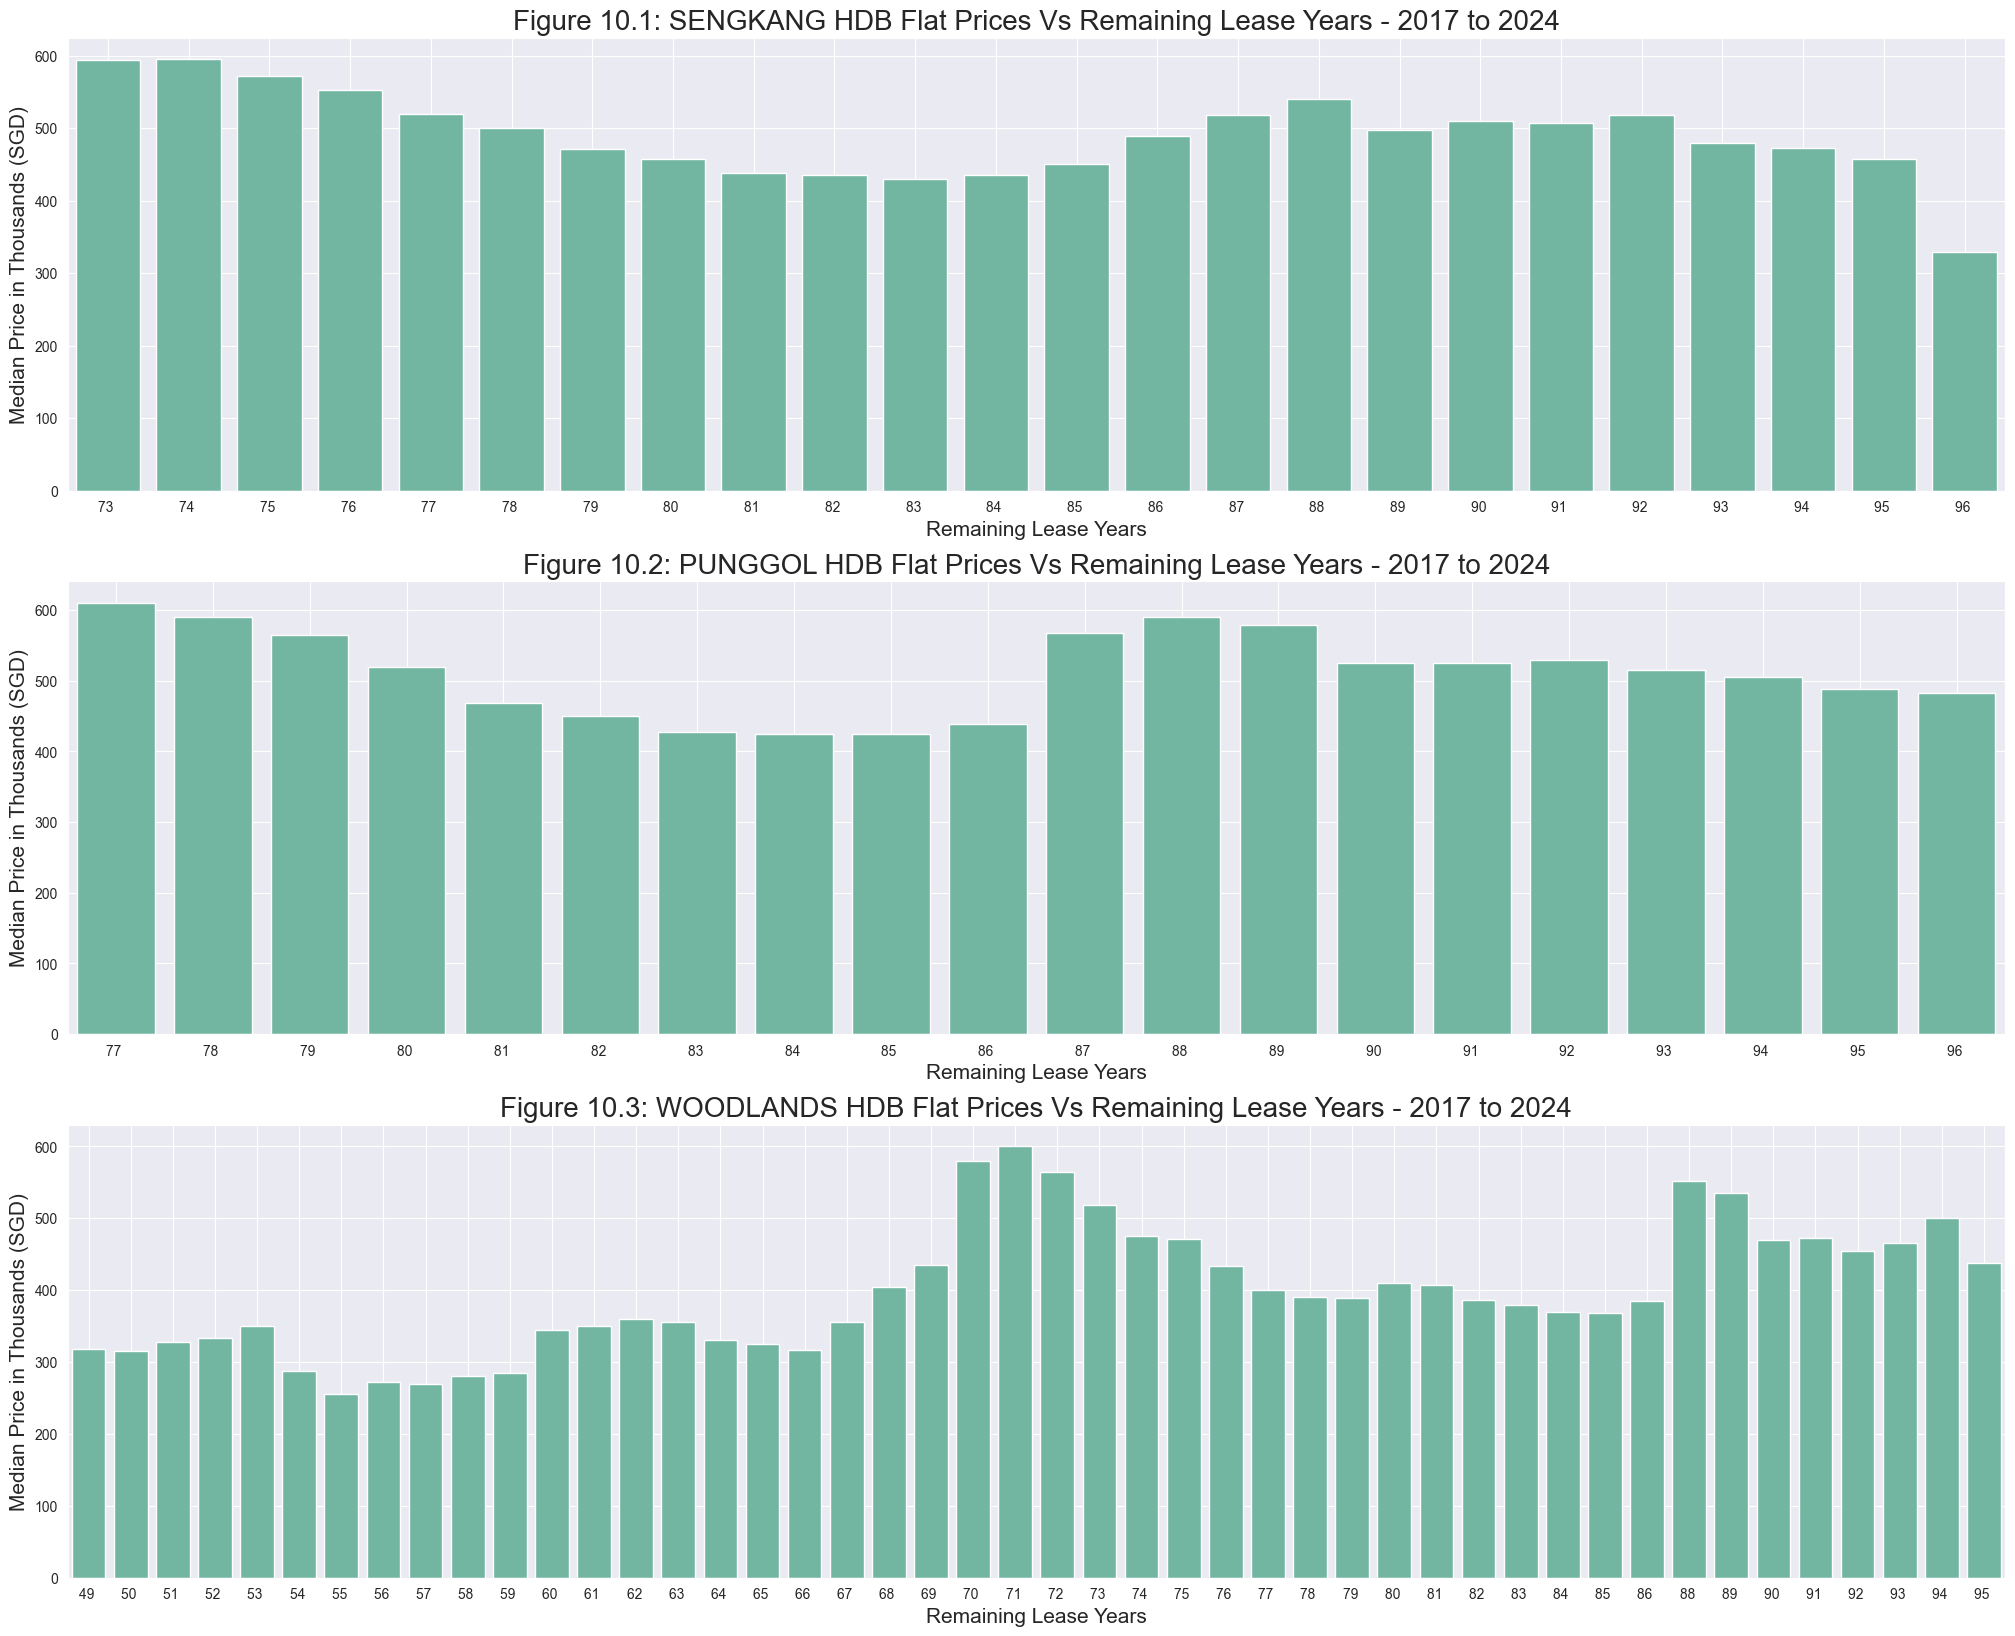

In [263]:
fig,ax=plt.subplots(3,1,figsize=(25,20))
names=['SENGKANG','PUNGGOL','WOODLANDS']

num=0

for i,town in enumerate(to_modify):
    sns.barplot(town.sort_values('remaining_lease_years'),x='remaining_lease_years',y='resale_price',ax=ax[i],estimator='median',errorbar=None)
    ax[i].set_xlabel('Remaining Lease Years',size=15)
    ax[i].set_ylabel('Median Price in Thousands (SGD)',size=15)
    ax[i].grid(axis='both')
    num+=1
    ax[i].set_title(f'Figure 10.{num}: {names[i]} HDB Flat Prices Vs Remaining Lease Years - 2017 to 2024',size=20)
    




